# Back-Door Criterion (p150)

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Authors: <b>Aymen Merrouche</b> and Pierre-Henri Wuillemin.

**This notebook follows the example from "The Book Of Why" (Pearl, 2018) chapter 4 page 150**

## Back-Door Criterion

In [1]:
from IPython.display import display, Math, Latex,HTML

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb
import os

> In a causal diagram, confounding bias is due to the flow of non-causal information between treatment $X$ and outcome $Y$ through back-door paths. To neutralize this bias, we need to block these paths. <br>
To block a non-causal path, we must perform an adjustment operation for a variable or a set of variables that would block the flow of information on that path. Such a set of variables satisfies what we call the "back-door" criterion.
> A set of variables $Z$ satisfies the back-door criterion for $(X, Y)$ if and only if:
* $Z$ blocks all back-door paths between $X$ and $Y$. A "back-door path" is any path in the causal diagram between $X$ and $Y$ starting with an arrow pointing towards $X$.
* No variable in $Z$ is a descendant of $X$ on a causal path, if we adjust for such a variable we would block a path that carries causal information hence the causal effect of $X$ on $Y$ would be biased.

<b>If a set of $ Z $ variable satisfies the back-door criterion for $(X,Y)$, the causal effect of $X$ on $Y$ is given by the formula: 
$$P(y \mid do(x)) = \sum_{z}{P(y \mid x,z) \times P(z)}$$</b>

### Example 1: 

In [2]:
e1 = gum.fastBN("X->A->Y;A->B")
e1

(pyAgrum.BayesNet<double>@0x124a4a600) BN{nodes: 4, arcs: 3, domainSize: 16, dim: 7, mem: 112o}

In [3]:
m1 = csl.CausalModel(e1)
cslnb.showCausalImpact(m1, "Y", doing="X",values={})

In [4]:
# This function returns the set of variables which satisfies the back-door criterion for (X, Y) 
# None if there are no back-door paths.
setOfVars = m1.backDoor("X","Y")
print("The set of variables which satisfies the back-door criterion for (X, Y) is :", setOfVars)

The set of variables which satisfies the back-door criterion for (X, Y) is : None


> No incoming arrows into X, therefore there are no back-door paths between $X$ and $Y$ (as if we did a graph surgery according to the do operator), direct causal path $X \rightarrow A \rightarrow Y$.

### Example 2:

In [5]:
e2 = gum.fastBN("A->B->C;A->X->E->Y;B<-D->E")
e2

(pyAgrum.BayesNet<double>@0x11280a200) BN{nodes: 7, arcs: 7, domainSize: 128, dim: 16, mem: 256o}

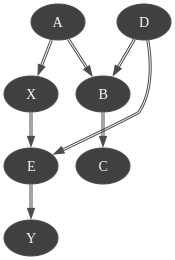

In [6]:
m2 = csl.CausalModel(e2)
gnb.show(m2)

In [7]:
cslnb.showCausalImpact(m2, "Y", doing="X",values={})

In [8]:
# This function returns the set of variables which satisfies the back-door criterion for (X, Y) 
# None if there are no back-door paths.
setOfVars = m2.backDoor("X","Y")
print("The set of variables which satisfies the back-door criterion for (X, Y) is :", setOfVars)

The set of variables which satisfies the back-door criterion for (X, Y) is : None


> There is one back-door path from $X$ to $Y$ :
$$X \leftarrow A \rightarrow B \leftarrow D \rightarrow E \rightarrow Y$$
We don't need to control for any set of variables; this back-door path is blocked by collider node $B$ (two incoming arrows)
$$A \rightarrow B \leftarrow D$$
Controlling for collider node $B$ would open this causal path (controlling for colliders increases bias), direct causal path $X \rightarrow E \rightarrow Y$.

### Example 3:

In [9]:
e3 = gum.fastBN("B->X->Y;X->A<-B->Y")
e3

(pyAgrum.BayesNet<double>@0x12428fc00) BN{nodes: 4, arcs: 5, domainSize: 16, dim: 11, mem: 176o}

In [10]:
m3 = csl.CausalModel(e3)
cslnb.showCausalImpact(m3, "Y", doing="X",values={})

In [11]:
# This function returns the set of variables which satisfies the back-door criterion for (X, Y) 
# None if there are no back-door paths.
setOfVars = m3.backDoor("X","Y")
print("The set of variables which satisfies the back-door criterion for (X, Y) is :", setOfVars)

The set of variables which satisfies the back-door criterion for (X, Y) is : {'B'}


> There is one back-door path from $X$ to $Y$ :
$$Y \leftarrow B \rightarrow X $$
We need to block it by controlling for $B$ wich satisfies the back-door criterion.

### Example 4 (M-bias):

In [12]:
e4 = gum.fastBN("X<-A->B<-C->Y")
e4

(pyAgrum.BayesNet<double>@0x124317000) BN{nodes: 5, arcs: 4, domainSize: 32, dim: 10, mem: 160o}

In [13]:
m4 = csl.CausalModel(e4)
cslnb.showCausalImpact(m4, "Y", doing="X",values={})

In [14]:
# This function returns the set of variables which satisfies the back-door criterion for (X, Y) 
# None if there are no back-door paths.
setOfVars = m4.backDoor("X","Y")
print("The set of variables which satisfies the back-door criterion for (X, Y) is :", setOfVars)

The set of variables which satisfies the back-door criterion for (X, Y) is : None


> There is one back-door path from $X$ to $Y$ :
$$X \leftarrow A \rightarrow B \leftarrow C \rightarrow Y$$
We don't need to control for any set of variables, this back-door path is blocked by collider node $B$, the two variables are d-separated, deconfounded, independent.  Controlling for collider node $B$ would make them dependant (introducing the M-bias).

### Example 5:

In [15]:
e5 = gum.fastBN("X<-B<-A->X->Y<-C->B")
e5

(pyAgrum.BayesNet<double>@0x16c825400) BN{nodes: 5, arcs: 6, domainSize: 32, dim: 14, mem: 224o}

In [16]:
m5 = csl.CausalModel(e5)
cslnb.showCausalImpact(m5, "Y", doing="X",values={})

![Game 4 and 5](images/game4.game5.png)

In [17]:
# This function returns the set of variables which satisfies the back-door criterion for (X, Y) 
# None if there are no back-door paths.
setOfVars = m5.backDoor("X","Y")
print("The set of variables which satisfies the back-door criterion for (X, Y) is :", setOfVars)

The set of variables which satisfies the back-door criterion for (X, Y) is : {'C'}


> The difference between this example and the previous one is that we added an arrow between $B$ and $X$ ( $B \rightarrow X$ ), this opens a new back-door path between $X$ and $Y$ that isn't blocked by any colliders $$X \leftarrow B \leftarrow C \rightarrow Y$$
We need to block the non-causal information that flows through it, controlling for $B$ closes this backdoor path (it prevents information from getting from $X$ to $C$). However, this action will open the back-door path that was formerly blocked by collider node $B$ that we are adjusting for now:
$$X \leftarrow A \rightarrow B \leftarrow C \rightarrow Y$$
And, in this case, in addition to $B$ we would also control for $C$ or for $A$ to reblock the path we opened and to block the new path. <br> <br>
Another solution is to control for $C$ (it prevents information from getting from $B$ to $Y$) which satisfies the back-door criterion, it blocks the new path without reopening the one that is blocked by $B$.

### Example 6:

In [18]:
e6 = gum.fastBN("A->X;A->B;D->A;B->X;C->B;C->E;C->Y;D->C;E->Y;E->X;F->C;F->X;F->Y;G->X;G->Y;X->Y")
e6

(pyAgrum.BayesNet<double>@0x16c827c00) BN{nodes: 9, arcs: 16, domainSize: 512, dim: 79, mem: 1Ko 240o}

In [19]:
m6 = csl.CausalModel(e6)
cslnb.showCausalImpact(m6, "Y", doing="X",values={})

In [20]:
# This function returns the set of variables which satisfies the back-door criterion for (X, Y) 
# None if there are no back-door paths.
setOfVars = m6.backDoor("X","Y")
print("The set of variables which satisfies the back-door criterion for (X, Y) is :", setOfVars)

The set of variables which satisfies the back-door criterion for (X, Y) is : {'F', 'C', 'E', 'G'}


> Back-door paths are: <br>
1) - $X \leftarrow G \rightarrow Y$ <br>
2) - $X \leftarrow E \rightarrow Y$ and any other back-door paths that go through $E$ <br>
3) - $X \leftarrow F \rightarrow Y$ and any other back-door paths that go through $F$ <br>
4) - Blocked by collider $B$ :  $X \leftarrow A \rightarrow B \leftarrow C \rightarrow Y$ and any other back-door paths that go through $ A$ will go through $C$ <br>
5) - $X \leftarrow B \leftarrow C \rightarrow Y$ and any other back-door paths that go through $B$ will go through $C$<br><br>
Two sets of variables that satisfy the back-door criterion are:
* {$C$,$E$,$F$,$G$} blocking (1), (2), (3) and (5)
* {$A$,$B$,$E$,$F$,$G$} blocking (1), (2), (3), (5), opening (4) and reblocking it.
